# Artificial Intelligence II: HW1



Printing Precision ,Recall and F1 scores

0.724364592462752
0.724364592462752
0.724364592462752

Ploting learing curves for all 3 score types



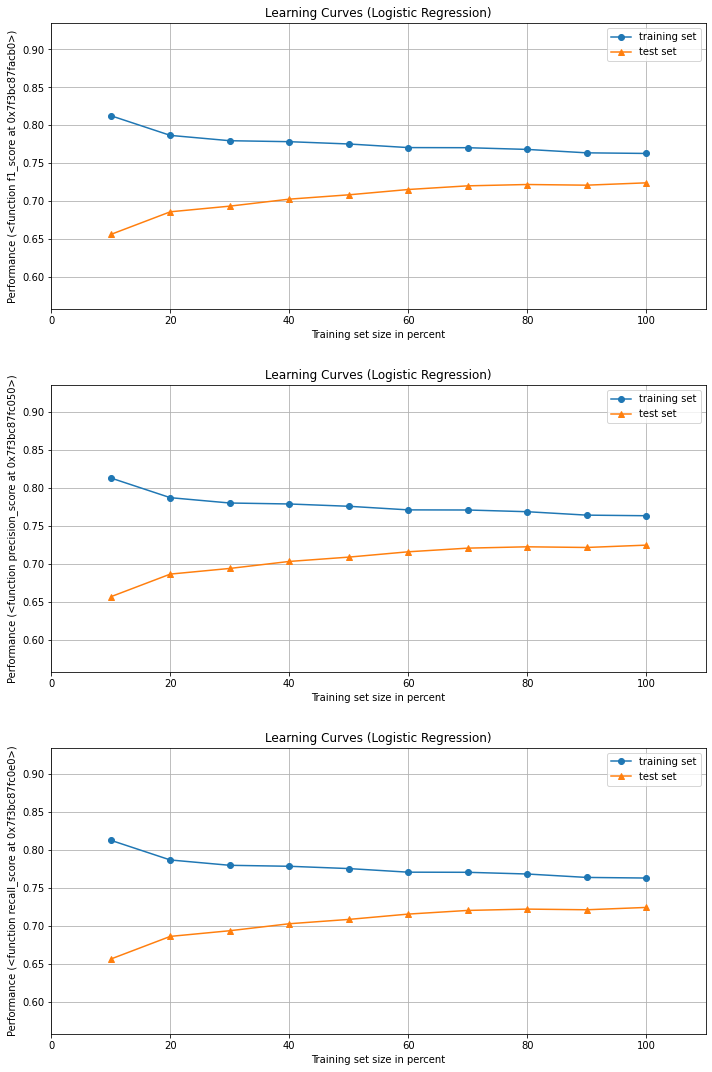

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer

### Loading the Dataset

#Reading a csv files with pandas only needs two lines of code
df = pd.read_csv("./vaccine_train_set.csv",index_col=0)
val = pd.read_csv("./vaccine_validation_set.csv",index_col=0)

###Data Pre-processing

X_train = df['tweet']
Y_train = df['label']

X_test = val['tweet']
Y_test  = val['label']

vectorizer = TfidfVectorizer(min_df = 0.001)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

###Train a model

clf =LogisticRegression(max_iter=1000,C=1,penalty='l2',solver='liblinear')
clf.fit(X_train, Y_train)

###Evaluate model's performance

#Now that we have trained the classifer, we can make predictions on the unseen data
Y_test_pred = clf.predict(X_test)
#Let's also make predictions on the train set for reference
Y_train_pred = clf.predict(X_train)

print("Printing Precision ,Recall and F1 scores\n")
print(precision_score(Y_test,Y_test_pred,average='micro'))
print(recall_score(Y_test,Y_test_pred,average='micro'))
print(f1_score(Y_test,Y_test_pred,average='micro'))

###Ploting learning curves
print("\nPloting learing curves for all 3 score types\n")


def plot_learning_curves(X_train, y_train,X_test, y_test,clf,title,prnt_scores=None,style='default',title_fontsize=12,legend_loc='best',train_marker='o',test_marker='^',):
  
    from sklearn import metrics
    scoring_func = {
       0: metrics.f1_score,
       1: metrics.precision_score,
       2: metrics.recall_score}

    
    #training_errors = []
    #test_errors = []

    rng = [int(i) for i in np.linspace(0, X_train.shape[0],11)][1:]

    training_errors = [[None] * (len(rng))] * 3
    test_errors = [[None] * (len(rng))] * 3

    figure, axes = plt.subplots(nrows=3,figsize=(10, 15))
    i=0
    for r in rng:
      model = clf.fit(X_train[:r], y_train[:r])

      y_train_predict = clf.predict(X_train[:r])
      y_test_predict = clf.predict(X_test)

      train_misclf = scoring_func[0](y_train[:r], y_train_predict,average='micro')
      training_errors[0][i]=train_misclf

      test_misclf = scoring_func[0](y_test, y_test_predict,average='micro')
      test_errors[0][i]=test_misclf
        
      train_misclf = scoring_func[1](y_train[:r], y_train_predict,average='micro')
      training_errors[1][i]=train_misclf

      test_misclf = scoring_func[1](y_test, y_test_predict,average='micro')
      test_errors[1][i]=test_misclf

      train_misclf = scoring_func[2](y_train[:r], y_train_predict,average='micro')
      training_errors[2][i]=train_misclf

      test_misclf = scoring_func[2](y_test, y_test_predict,average='micro')
      test_errors[2][i]=test_misclf
      i+=1

    for flag in range(0,3):
      if prnt_scores!=None:
        print("Scores for ")
        print(scoring_func[flag])
        print(training_errors[flag])
        print(test_errors[flag])
        print("\n")
      axes[flag].grid()
      axes[flag].plot(np.arange(10,101,10), training_errors[flag],label='training set', marker=train_marker)
      axes[flag].plot(np.arange(10,101,10), test_errors[flag],label='test set', marker=test_marker)
      axes[flag].set_xlabel('Training set size in percent')


      axes[flag].set_ylabel('Performance ({})'.format(scoring_func[flag]))
      axes[flag].set_title(title)
      axes[flag].legend(loc=legend_loc, numpoints=1)
      axes[flag].set_xlim([0, 110])
      max_y = max(max(test_errors[flag]), max(training_errors[flag]))
      min_y = min(min(test_errors[flag]), min(training_errors[flag]))
      axes[flag].set_ylim([min_y - min_y * 0.15, max_y + max_y * 0.15])
    figure.tight_layout()


title = "Learning Curves (Logistic Regression)"
plot_learning_curves(X_train,Y_train,X_test,Y_test,clf,title) #,prnt_scores=1 to print scores